Q1. Problem Statement: Decision Tree using CART Algorithm
You are given a dataset – “car_evaluation.csv.” Load the dataset into a
DataFrame without the header and rename the columns as the list given here -
['buying', 'maint', 'doors', 'persons', 'lug_boot',
'safety', 'class']. Considering the “class” column as the target
variable, perform the following tasks:


# Import Librarys

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline


# Upload the datasset

In [ ]:
a=pd.read_csv('car_evaluation.csv')
display(a)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:

a.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
a.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
a.shape

(1727, 7)

In [ ]:
a.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
a.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Explore the target column –“class,” (Our task is to predict how the car
features effet the class of car as - Very good, Good, Acceptable, or
Unacceptable, that is why we have considered this column as the target
column)

In [ ]:
b=a['class'].value_counts()
print('Frequancy of each ordinal data  in the target coloumns ','\n',b)

Frequancy of each ordinal data  in the target coloumns  
 unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


# Declare feature vectors and the target variable

In [ ]:
x=a.drop('class',axis=1)
print('featire value is','\n',x)

featire value is 
      buying  maint  doors persons lug_boot safety
0     vhigh  vhigh      2       2    small    med
1     vhigh  vhigh      2       2    small   high
2     vhigh  vhigh      2       2      med    low
3     vhigh  vhigh      2       2      med    med
4     vhigh  vhigh      2       2      med   high
...     ...    ...    ...     ...      ...    ...
1722    low    low  5more    more      med    med
1723    low    low  5more    more      med   high
1724    low    low  5more    more      big    low
1725    low    low  5more    more      big    med
1726    low    low  5more    more      big   high

[1727 rows x 6 columns]


In [ ]:
y=a['class']
print('Target values is','\n',y)

Target values is 
 0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object


# Split the data into test and train fragments using train_test_split()
function in 80:20 ratio (80% train, 20% test)

In [ ]:
x=a.drop('class',axis=1)
y=a['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(346, 6)
(1381, 6)
(346,)
(1381,)


# Encode the all the ordinal data into numeric values using category_encoders 


In [ ]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce
v=ce.OrdinalEncoder(b,cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X=v.fit_transform(x_train)
Xt=v.transform(x_test)

In [ ]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [ ]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


# Predicting the test results using a Decision tree classifier based on Gini index
criteria

In [ ]:
h=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
h
h.fit(X,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini=h.predict(Xt)
display(y_pred_gini)

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc'

# Check the accuracy score of the model based on gini index

In [ ]:
m=(accuracy_score(y_pred_gini,y_test))
m

0.7687861271676301

# Visualize the decision tree using Graphviz


In [ ]:
graph=open('garph.dot','w')

export_graphviz(h,out_file=None,filled=True,special_characters=True,
                feature_names=x_train.columns,class_names=y_train,rounded=True)
graph.close()

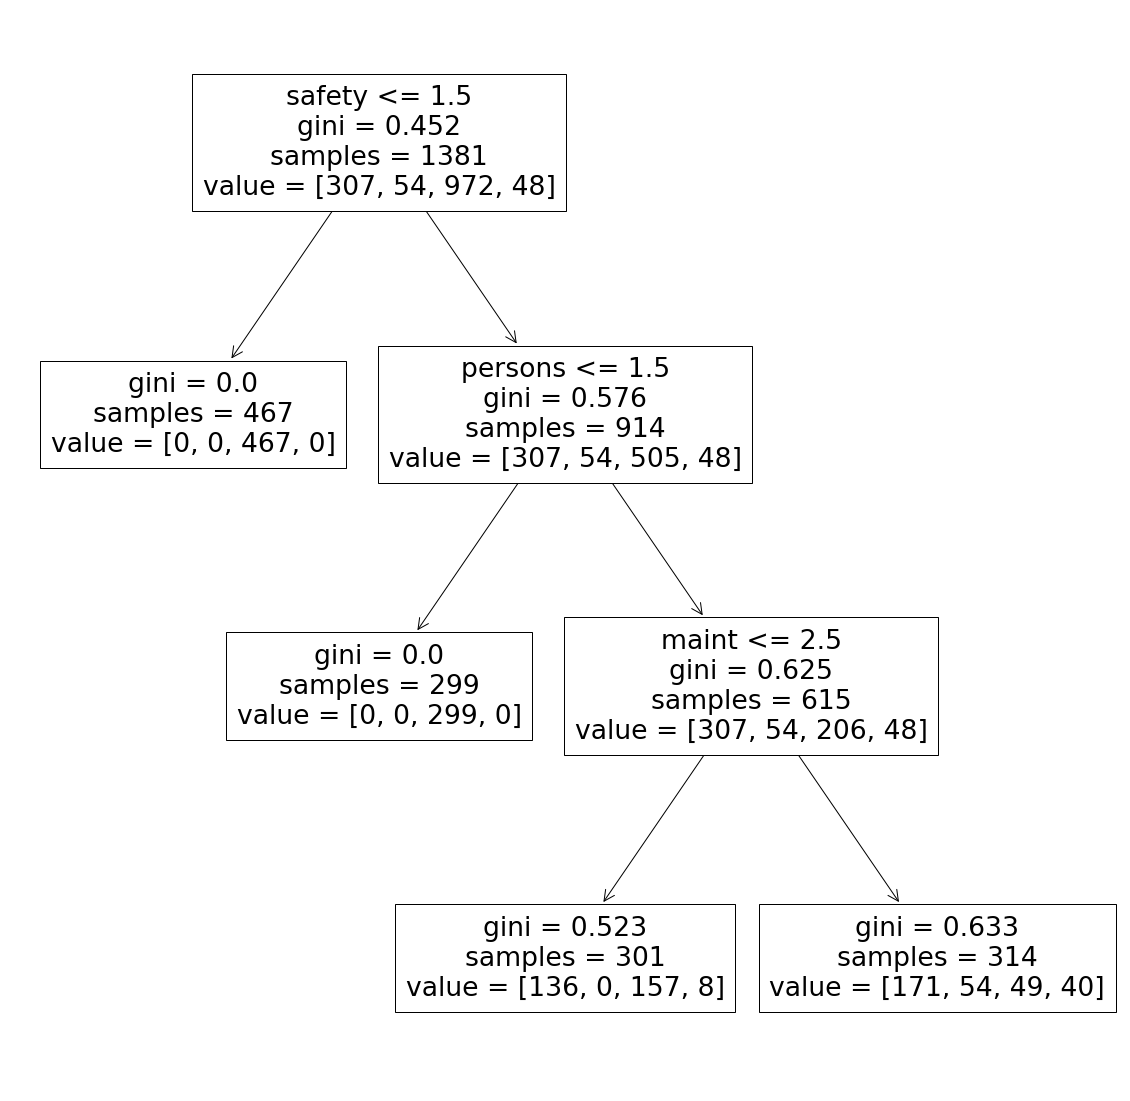

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(h,class_names=None,feature_names=list(x_train.columns))
plt.show()

# Show how the importance of features affects the target variable

In [ ]:

features=pd.DataFrame({'Features':x_train.columns,'Importance':np.round(h.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
features

,Features,Importance
3,persons,0.528
5,safety,0.368
1,maint,0.104
0,buying,0.000
2,doors,0.000
4,lug_boot,0.000
